In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score

In [ ]:
def convert(X):
    return X/(X.max())

In [2]:
from numpy import loadtxt

X_train = loadtxt('/content/drive/MyDrive/Học máy/preprocessing-data/word2vec/dataIntXTrain.csv', delimiter=',')
Y_train = loadtxt('/content/drive/MyDrive/Học máy/preprocessing-data/word2vec/dataIntYTrain.csv', delimiter=',')

In [3]:
X_test = loadtxt('/content/drive/MyDrive/Học máy/preprocessing-data/word2vec/dataIntXTest.csv', delimiter=',')
Y_test = loadtxt('/content/drive/MyDrive/Học máy/preprocessing-data/word2vec/dataIntYTest.csv', delimiter=',')


In [ ]:
X_train = convert(X_train)

In [ ]:
X_test = convert(X_test)

In [ ]:
def disZ(Z,X):
    X2 = np.nansum(X*X,1)
    Z2 = np.nansum(Z*Z,1)
    return Z2.reshape(-1,1) + X2.reshape(1,-1) - 2*Z.dot(X.T)

In [ ]:
def predict():
    Y_pred = []
    k = int(np.sqrt(X_train.shape[0]))
    step = [[0,10000],[10000,20000],[20000,X_test.shape[0]]]
    for x in step:
        X = 0
        dis = 0
        dis = disZ(X_test[x[0]:x[1]],X_train)
        X = []
        for i in range(dis.shape[0]):
            if i % 500==0:
                print(i)
            tm = np.argsort(dis[i])
            X.append(tm[0:k])
        for i in range(dis.shape[0]):
            if i % 1000 ==0:
                print(i)
            sum = np.zeros((10))
            for j in X[i]:
                sum[int(Y_train[j])]+=(1/dis[i][j])
            Y_pred.append(np.argmax(sum))
    return Y_pred

In [ ]:
Y_pred = predict()

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
0
1000
2000
3000
4000
5000


In [ ]:
# k = int(np.sqrt(X_train.shape[0]))

In [ ]:
# tính từ A -> B

In [ ]:
# X = []
# dis = 0

In [ ]:
# dis = disZ(X_test[20000:],X_train)

In [ ]:
# X = []
# for i in range(dis.shape[0]):
#     if i % 500==0:
#         print(i)
#     tm = np.argsort(dis[i])
#     X.append(tm[0:k])

In [ ]:
# Y_pred = []

In [ ]:
# for i in range(dis.shape[0]):
#     if i % 100 ==0:
#         print(i)
#     sum = np.zeros((10))
#     for j in X[i]:
#         sum[int(Y_train[j])]+=(1/dis[i][j])
#     Y_pred.append(np.argmax(sum))

In [ ]:
len(Y_pred)

25240

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test,Y_pred,average=None)*100

In [ ]:
from sklearn.metrics import precision_score, recall_score

ps = precision_score(Y_test,Y_pred,average=None)*100

In [ ]:
rc = recall_score(Y_test,Y_pred,average=None)*100

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
f1 = np.round(f1,2)
ps = np.round(ps,2)
rc = np.round(rc,2)

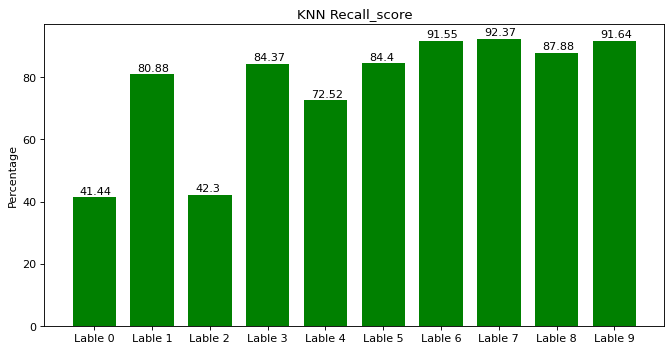

In [ ]:
divisions = ["Lable 0","Lable 1","Lable 2","Lable 3","Lable 4","Lable 5","Lable 6","Lable 7","Lable 8","Lable 9"]


plt.figure(figsize=(10,5), dpi=80)
index = np.arange(0,20,2)
plt.bar(index,rc,width=1.5,color='green',label='F1_score')

plt.xticks(index,divisions)
for index, value in enumerate(rc):
    plt.text(index*2-0.5, value+1,
             str(value))

plt.ylabel('Percentage')
# plt.xlabel('Recall_score')
plt.title('KNN Recall_score')

plt.savefig('KNN Recall_score.png')
plt.show()